# Debug Binary 

## Debug 1 

In [13]:
# origin debug function 
def bsearch1(arr, key):
    low, high = 0, len(arr)
    while high - low > 1:
        mid = (low + high) // 2
        if arr[mid] == key:
            return mid
        elif arr[mid] < key:
            low = mid
        else:
            high = mid
    return None

In [16]:
def bsearch_debug(arr, key):
    low, high = 0, len(arr)
    while high > 1 + low: 
        mid = (low + high) // 2
        if arr[mid] == key:
             return mid 
        elif arr[mid] < key: 
            low = mid
        else: 
            high = mid 
    if arr[low] == key: 
         return low 
    elif arr[high] == key: 
        return high
    return None

In [156]:
s = bsearch1([1,2,3], 1)
print(s)

None


In [157]:
s2 = bsearch_debug([1,2,3], 1)
print(s2)

0


1. bug: the algorithm doesn't work for the target value on the first element.
Input: arr = [1], key = 1, exp output: 0, before debug: None. Input: arr = [2,3,4,5], key = 2, output: 0.   

2. suggestion: we can add an if statement to see whether the corner point satisfied the requirement 

3. Natural test: we can put some corner cases to test the algorithm. Input: arr = [1], key = 1, exp output: 0, before debug: None. Input: arr = [2,3,4,5], key = 2, output: 0.  

## Debug 2

In [160]:
# origin debug function 
def bsearch2(arr, key, left=0, right=None):
    if right is None:
        right = len(arr)
    if right < left:
        return None
    middle = (left + right) >> 1
    if arr[middle] > key:
        return bsearch2(arr, key, left, middle)
    if arr[middle] < key:
        return bsearch2(arr, key, middle + 1, right)
    return middle

In [161]:
def bsearch2_debug(arr, key, left=0, right=None): 
    if right is None: 
        right = len(arr) - 1 
    if right < left: 
        return None 
    middle = (left + right) >> 1 
    if arr[middle] > key:
        return bsearch2(arr, key, left, middle-1) 
    if arr[middle] < key:
        return bsearch2(arr, key, middle + 1, right)
    return middle

In [162]:
bsearch2(arr = [1,2,3,4,5], key = 9 ,left=0, right=None)

IndexError: list index out of range

In [164]:
s3 = bsearch2_debug(arr = [1,2,3,4,5], key = 9 ,left=0, right=None)
print(s3)

None


1.bug: oversearch the arr. raise IndexError  

2. suggestion: the stop condition is right < left, in other words, the algorithm searches while (right >= left). Since there is an overlap between the left and right areas. The search area should not be the length of the arr, or it risks over searching. To fix it, we need to reduce the search area and place the left and right sides appropriately. (right = len(arr) - 1,     if arr[middle] > key: return bsearch2(arr, key, left, middle-1)) 

3. Natural test: arr = [1,2,3,4,5], key = 9,  exp output = None, before debug: raise IndexError  


## Debug 3

In [2]:
import matplotlib.pyplot as plt
import random
import time

In [3]:
def bsearch3(arr, key):
    n = len(arr)
    if n < 2:
        return (0 if (n == 1 and arr[0] == key) else None)
    m = int(0.5 * n)
    if arr[m] > key:
        return bsearch3(arr[:m], key)
    result = bsearch3(arr[m:], key)
    if result!= None:
        return result + m
    else:
        return result 

In [4]:
def bs1(A, t):
    l = 0
    r = len(A)-1
    while(l <= r):
        mid = (l+r)//2
        if A[mid] == t:
            return mid
        if A[mid] > t:
            r = mid-1
        else:
            l = mid +1 
    return -1

In [73]:
def generate_random_lst(size, right_border):
    numList = []
    for i in range(0, size):
        numList.append(random.randint(0, right_border))
    return sorted(numList)

In [165]:
def main():
    time_lst = []

    # We do 10000 trials for each value of n
    for size in range(4000):
        sumSlicingBinaryTime = 0  # total time, over 100 trials, that slicing recursive binarySearch takes
        sumONTime = 0  # total time, over 100 trials, that standard binarySearch takes
        for right_border in range(0, 10):
            # print(size, right_border)
            numList = generate_random_lst(size, right_border) # generate random test with size and border

            # Generate a number to search for
            x = random.randint(0, right_border)

            # Compute the time it takes for recursive binarySearch 
            sbt = time.time()
            slicingbinaryFound = bsearch3(numList,x)
            ebt = time.time()
            elapsedSlicingBinaryTime = ebt - sbt

            # Compute the time it takes for lstandard binarySearch
            slt = time.time()
            onFound = bs1(numList, x)
            elt = time.time()
            elapsedONTime = elt - slt

            sumSlicingBinaryTime  += elapsedSlicingBinaryTime
            sumONTime += elapsedONTime
            
        time_lst.append((sumSlicingBinaryTime, sumONTime))
    times = round(sumSlicingBinaryTime/sumONTime)  
    
    print(f"slicing is {times} time compare with standard binary search ")
    return time_lst 

In [166]:
time_lst = main()

slicing is 10 time compare with standard binary search 


In [167]:
recursive_search = [x[0] for x in time_lst]
regular_search = [x[1] for x in time_lst]

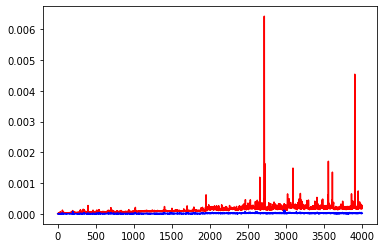

In [168]:
plt.plot([i for i in range(len(recursive_search))],recursive_search, 'r-')
plt.plot([i for i in range(len(regular_search))],regular_search,'b-')

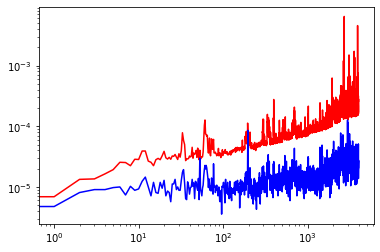

In [169]:
plt.loglog([i for i in range(len(recursive_search))],recursive_search, 'r-')
plt.loglog([i for i in range(len(regular_search))],regular_search,'b-')

1. 
- bug1: time complexity exceeded. For binary search, the time complexity should be O(logn). However, in implementation3, the time complexity is O(nlogn) due to slicing operation. 

- bug2: when I run this with arr = [1,2,3], key = 9, I got TypeError. Clearly, the algorithm doesn't take the scenarios that the target element is not on the list. 


2. suggestion: 
- Time Complexity Error: use standard binary search code or dont use slicing in the current code. 
- Type Error: should take the case that the element is not in the list into consideration. 

standard code 
```
def bsearch3_debug(arr, key): 
    n = len(arr) 
    if n < 2: 
        return (0 if (n == 1 and arr[0] == key) else None) 
    m = int(0.5 * n)
    if arr[m] > key: 
        return bsearch3(arr[:m], key) 
    result = bsearch3(arr[m:], key) 
    if result!= None: 
        return result + m 
   else: 
        return result ```

3. test: 
1. Time complexity: run 100,000 iteration and observe their running time. Clearly, the run time for recursive slicing way of binary search is higher than the standard one. 

2. TypeError arr[1,2,3], key = 9, exp output: none, output before debug: raise TypeError 
